In [ ]:
#pip install geopy
#pip install geocoder

# NOMINATIM
### To get the GPS coordinates of the cities

In [1]:
cities =  ["Mont Saint Michel","St Malo","Bayeux","Le Havre","Rouen","Paris","Amiens","Lille","Strasbourg",
    "Chateau du Haut Koenigsbourg","Colmar","Eguisheim","Besancon","Dijon","Annecy","Grenoble","Lyon","Gorges du Verdon",
    "Bormes les Mimosas","Cassis","Marseille","Aix en Provence","Avignon","Uzes","Nimes","Aigues Mortes","Saintes Maries de la mer",
    "Collioure","Carcassonne","Ariege","Toulouse","Montauban","Biarritz","Bayonne","La Rochelle"]

from geopy.geocoders import Nominatim
import pandas as pd

locations = []
for city in cities:
    geolocator = Nominatim(user_agent='myapplication')
    location = geolocator.geocode(city)
    loca = location.raw
    locations.append(loca)

df_locations = pd.DataFrame(locations) 

In [2]:
df_locations = df_locations.rename(columns={"name": "City"}) #I renamed name with city
df_locations2 = df_locations[["lat", "lon", "City"]]
df_locations2.head(2)
#df.to_csv('df_locations2.csv')

,lat,lon,City
0,48.6359541,-1.511459954959514,Mont Saint-Michel
1,49.314695,-96.9538228,St. Malo


# OPEN WEATHER MAP

### To get data from the weather

In [3]:
import requests
import pandas as pd

cities = ["Mont Saint Michel", "St Malo", "Bayeux", "Le Havre", "Rouen", "Paris", "Amiens", "Lille", "Strasbourg",
          "Chateau du Haut Koenigsbourg", "Colmar", "Eguisheim", "Besancon", "Dijon", "Annecy", "Grenoble", "Lyon",
          "Gorges du Verdon", "Bormes les Mimosas", "Cassis", "Marseille", "Aix en Provence", "Avignon", "Uzes",
          "Nimes", "Aigues Mortes", "Saintes Maries de la mer", "Collioure", "Carcassonne", "Ariege", "Toulouse",
          "Montauban", "Biarritz", "Bayonne", "La Rochelle"]

# Your Visual Crossing Weather API key
API_KEY = 'A6T2F7E9E4L82MX5S2HJTGQ5X'

weather_data = []

for city in cities:
    # Make API request for each city
    response = requests.get(
        f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{city}?unitGroup=metric&key={API_KEY}")

    if response.status_code == 200:
        data = response.json()
        # Extract relevant information
        city_weather = {
            'City': city,
            'Date': [forecast['datetime'] for forecast in data['days']],
            'Temperature max (C)': [forecast['tempmax'] for forecast in data['days']],
            'Temperature min (C)': [forecast['tempmin'] for forecast in data['days']],
            'Temperature (C)': [forecast['temp'] for forecast in data['days']],
            'Precipitations': [forecast['precip'] for forecast in data['days']],
            'Weather Description': [forecast['conditions'] for forecast in data['days']],
            'Cloud cover': [forecast['cloudcover'] for forecast in data['days']], 
            'Solar radiation': [forecast['solarradiation'] for forecast in data['days']],
            'Wind speed': [forecast['windspeed'] for forecast in data['days']],
        }
        weather_data.append(city_weather)
    else:
        print(f"Failed to fetch weather forecast for {city}. Status code: {response.status_code}")

# Convert to DataFrame
df_weather = pd.concat([pd.DataFrame(data) for data in weather_data], ignore_index=True)

# Display the DataFrame
#print(df_weather)

Failed to fetch weather forecast for Chateau du Haut Koenigsbourg. Status code: 400
Failed to fetch weather forecast for Uzes. Status code: 400


In [4]:
df_weather.describe()

,Temperature max (C),Temperature min (C),Temperature (C),Precipitations,Cloud cover,Solar radiation,Wind speed
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,11.956970,5.895758,8.741616,2.330707,70.500000,98.347677,21.122626
std,5.672694,5.891781,5.480766,4.343410,26.955029,54.943954,10.976062
min,-9.500000,-18.200000,-12.300000,0.000000,0.700000,2.400000,4.000000
25%,9.850000,3.800000,6.850000,0.000000,49.950000,62.400000,11.700000
50%,12.100000,6.200000,9.200000,0.300000,77.000000,98.300000,19.400000
75%,14.300000,8.500000,10.800000,2.150000,94.700000,137.650000,28.100000
max,33.000000,25.200000,28.300000,26.100000,100.000000,296.900000,62.600000


In [5]:
df_weather.columns

Index(['City', 'Date', 'Temperature max (C)', 'Temperature min (C)',
       'Temperature (C)', 'Precipitations', 'Weather Description',
       'Cloud cover', 'Solar radiation', 'Wind speed'],
      dtype='object')

In [6]:
df_weathernice = df_weather.drop(["City", "Date", "Weather Description", "Cloud cover","Wind speed","Precipitations"], axis =1)
df_weatherbad = df_weather.drop(["City", "Date", 'Temperature max (C)', 'Temperature min (C)',
                                'Temperature (C)', 'Weather Description','Solar radiation'], axis =1)


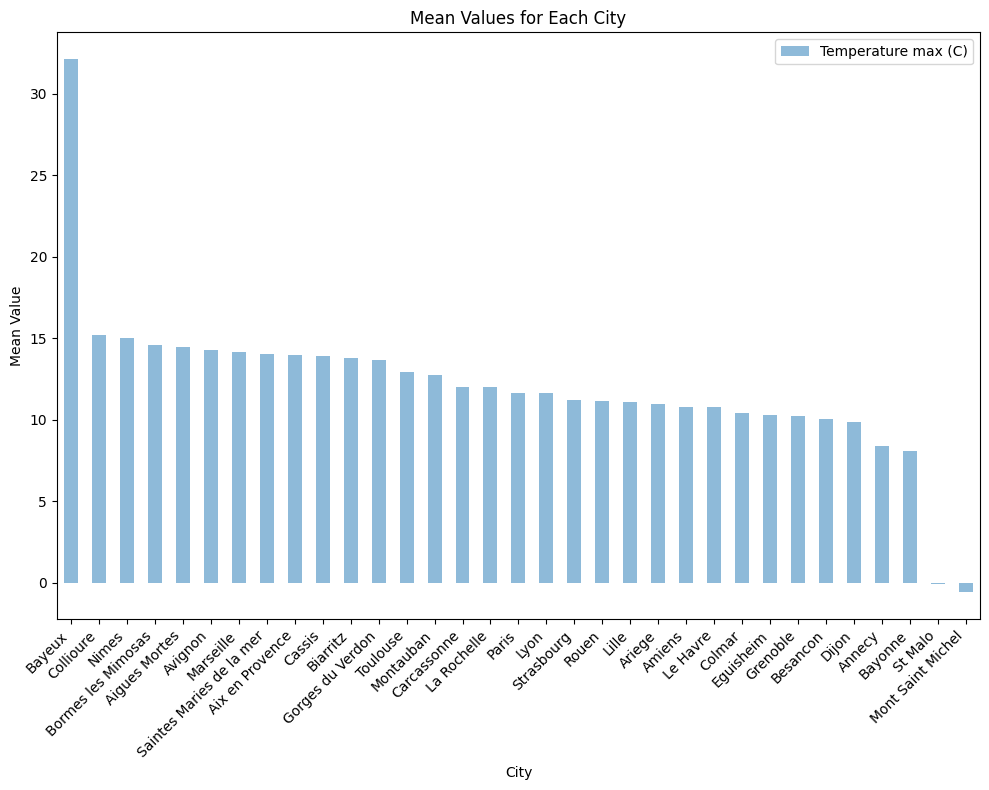

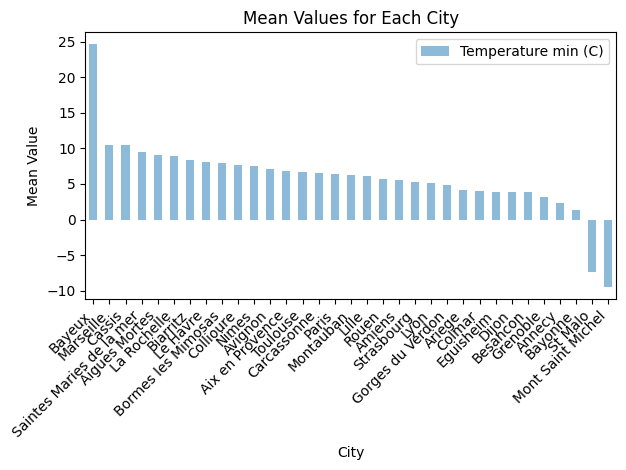

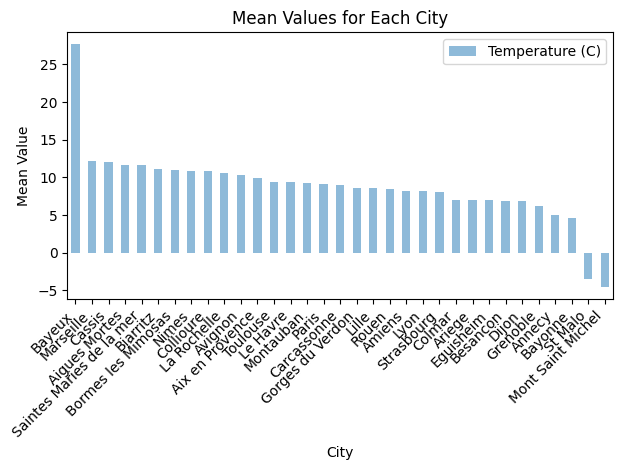

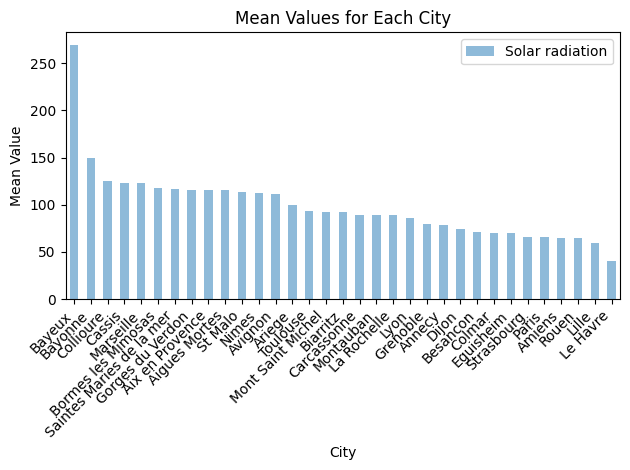

In [7]:
import matplotlib.pyplot as plt

# Create a figure object outside the loop
plt.figure(figsize=(10, 8))

# Iterate over each column except "City"
for column in df_weathernice:
    # Compute the mean value for each city and sort the values in descending order
    mean_value_sorted = df_weather.groupby("City")[column].mean().sort_values(ascending=False)
    
    # Plot the mean value for each city
    mean_value_sorted.plot(kind='bar', alpha=0.5, label=column)

    # Add title, labels, legend, and adjust layout
    plt.title('Mean Values for Each City')
    plt.xlabel('City')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

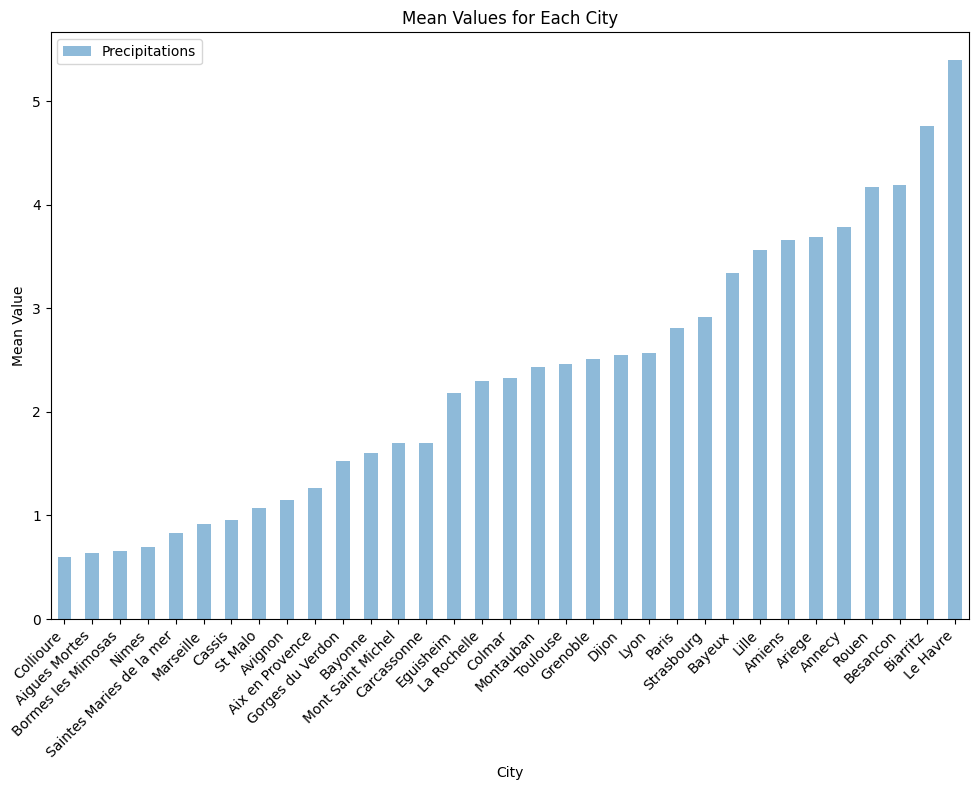

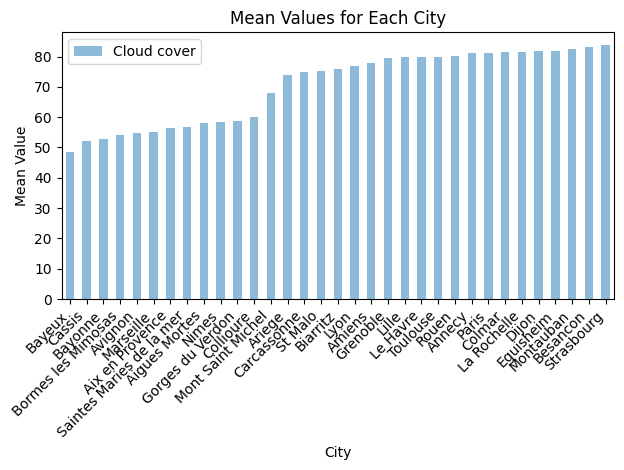

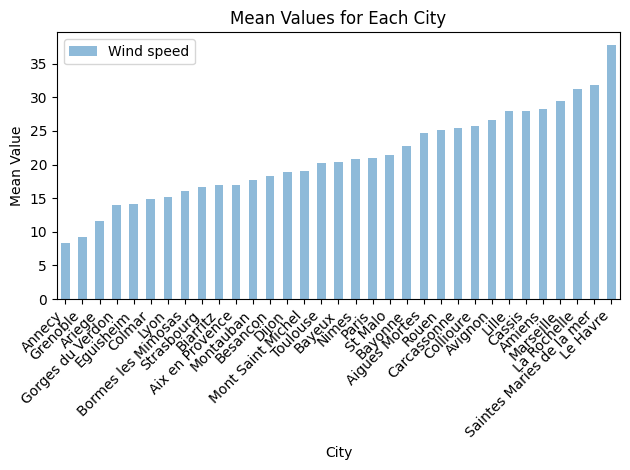

In [8]:
import matplotlib.pyplot as plt

# Create a figure object outside the loop
plt.figure(figsize=(10, 8))

# Iterate over each column except "City"
for column in df_weatherbad:
    # Compute the mean value for each city and sort the values in descending order
    mean_value_sorted = df_weather.groupby("City")[column].mean().sort_values(ascending=True)
    
    # Plot the mean value for each city
    mean_value_sorted.plot(kind='bar', alpha=0.5, label=column)

    # Add title, labels, legend, and adjust layout
    plt.title('Mean Values for Each City')
    plt.xlabel('City')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [9]:
# Check the cities with ideal conditions
df = df_weather.loc[(df_weather['Temperature max (C)'] < 30) & (df_weather['Temperature min (C)'] > 5) & (df_weather['Solar radiation'] < 150) &
                    (df_weather['Cloud cover'] <60) &  (df_weather['Cloud cover'] <60) & (df_weather['Precipitations']<3) ]
best_cities = df["City"].value_counts()
top_7cities = best_cities.nlargest(7)
top_7cities_list = top_7cities.index.tolist()

In [10]:
top_7cities_list  #this is the list of the 7th best cities acoording to their weather conditions in the following 15 days

['Avignon',
 'Marseille',
 'Aigues Mortes',
 'Saintes Maries de la mer',
 'Aix en Provence',
 'Nimes',
 'Bormes les Mimosas']

In [11]:
df_top_7_cities = df_weather[df_weather['City'].isin(top_7cities_list)]# selection of the rows of the top cities

In [12]:
final_top7_cities = pd.merge(df_weather, df_locations, on="City", how="inner")#merge of the 2 dataframes : df_weather and df_locations

In [13]:
final_top7_cities.columns

Index(['City', 'Date', 'Temperature max (C)', 'Temperature min (C)',
       'Temperature (C)', 'Precipitations', 'Weather Description',
       'Cloud cover', 'Solar radiation', 'Wind speed', 'place_id', 'licence',
       'osm_type', 'osm_id', 'lat', 'lon', 'class', 'type', 'place_rank',
       'importance', 'addresstype', 'display_name', 'boundingbox'],
      dtype='object')

In [22]:
#we have to convert the type of the latitude and longitude values from object to float to use the plotly map library
final_top7_cities['lat'] = final_top7_cities['lat'].astype('float64')
final_top7_cities['lon'] = final_top7_cities['lon'].astype('float64') 

In [34]:
import folium

# Create a map centered at an initial location
map_center = [final_top7_cities['lat'].mean(), final_top7_cities['lon'].mean()]
map = folium.Map(location=map_center, zoom_start=6)

# Add markers for each location
for index, row in final_top7_cities.iterrows():
    popup_text = f"City: {row['City']}<br>Temp.: {row['Temperature (C)']}<br>Solar Radiation: {row['Solar radiation']} <br>Cloud cover: {row['Cloud cover']}<br>Precipitations: {row['Precipitations']} "
    folium.Marker(location=[row['lat'], row['lon']], popup=popup_text).add_to(map)

# Display the map
map